In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress

import pandas as pd
import numpy as np

file_path = "CleanDataFinal.xlsx"  
sheet_name = "Two Main Variables"
df = pd.read_excel(file_path, sheet_name=sheet_name)

df = df.T
df.columns = df.iloc[0]
df = df.iloc[2:]
df.index.name = "Year"

df.columns = ["Average Gross Income (PHP)", "Housing Price Index (2010 = 100)"]

### INSTRUCTIONS <BR>

At least three z-scores computations with varying types of questions <br>
At least three percentiles (excluding quartiles) computations with varying types of questions <br>
At least three standard normal distribution computations with varying types of questions <br>

In [3]:
df['Average Gross Income (PHP)'] = pd.to_numeric(df['Average Gross Income (PHP)'])
df['Housing Price Index (2010 = 100)'] = pd.to_numeric(df['Housing Price Index (2010 = 100)'])

z_scores_income = stats.zscore(df['Average Gross Income (PHP)'])
z_scores_hpi = stats.zscore(df['Housing Price Index (2010 = 100)'])

z_table = pd.DataFrame({
    "Z-Score (Income)": z_scores_income,
    "Z-Score (HPI)": z_scores_hpi
})

print(z_table)

      Z-Score (Income)  Z-Score (HPI)
Year                                 
1992         -1.362175      -1.628509
1993         -1.325557      -1.534306
1994         -1.274898      -1.430986
1995         -1.217283      -1.358054
1996         -1.150980      -1.263851
1997         -1.100929      -1.160532
1998         -0.968658      -1.032902
1999         -0.906075      -0.914388
2000         -0.843856      -0.814107
2001         -0.759587      -0.668244
2002         -0.693536      -0.574041
2003         -0.617058      -0.516304
2004         -0.489147      -0.464644
2005         -0.364335      -0.291432
2006         -0.249033      -0.151646
2007         -0.151240       0.051954
2008          0.027987       0.115769
2009          0.058987       0.194778
2010          0.146446       0.465232
2011          0.311294       0.653638
2012          0.477921       0.772152
2013          0.621919       0.875472
2014          0.781266       1.012218
2015          0.886022       0.951442
2016        

### Z-Scores: <br>

Q: What is the z-score for the HPI in 2020, is it above or below the mean? What does it mean in the context of the last 30 years?  <br>
Q: What are the z-scores for the Average Gross Income in 1995 and 2015? Which year deviates more? What does that mean? <br>
  Q: Are there any significant outliers (z-score greater than 3 or -3) in the z-scores of the Housing Price Index and Average Gross Income in the last 30 years? <br>

In [101]:
hpi_data = df['Housing Price Index (2010 = 100)']
mean_hpi = sum(hpi_data) / len(hpi_data)
std_dev_hpi = (sum([(x - mean_hpi) ** 2 for x in hpi_data]) / len(hpi_data)) ** 0.5
hpi_2020 = df['Housing Price Index (2010 = 100)'].iloc[28]  # 127.3
z_score_2020 = (hpi_2020 - mean_hpi) / std_dev_hpi

if z_score_2020 > 0:
    interpretation = "The HPI in 2020 is above the mean by approximately {} standard deviations.".format(z_score_2020)
elif z_score_2020 < 0:
    interpretation = "The HPI in 2020 is below the mean by approximately {} standard deviations.".format(abs(z_score_2020))
else:
    interpretation = "The HPI in 2020 is equal to the mean."

print('Question 1: Calculate z-score for HPI in 2020\n')
print("Z-score for HPI in 2020:", z_score_2020)
print(interpretation)

Question 1: Calculate z-score for HPI in 2020

Z-score for HPI in 2020: 1.2948276167022366
The HPI in 2020 is above the mean by approximately 1.2948276167022366 standard deviations.


In [5]:
income_data = df['Average Gross Income (PHP)']
mean_income = sum(income_data) / len(income_data)
std_dev_income = (sum([(x - mean_income) ** 2 for x in income_data]) / len(income_data)) ** 0.5

income_1995 = df['Average Gross Income (PHP)'].iloc[3] 
income_2015 = df['Average Gross Income (PHP)'].iloc[23] 

z_score_1995 = (income_1995 - mean_income) / std_dev_income
z_score_2015 = (income_2015 - mean_income) / std_dev_income

higher_z_score_year = "1995" if z_score_1995 > z_score_2015 else "2015"

print("Question 2: Calculate the z-scores for the Average Gross Income in 1995 and 2015. \nWhich year had a higher z-score, and what does this indicate about income changes over time?\n")

print("Z-score for Income in 1995:", z_score_1995)
print("Z-score for Income in 2015:", z_score_2015)

z_score_1995 = abs(z_score_1995)
z_score_2015 = abs(z_score_2015)
difference = abs(z_score_2015 - z_score_1995)

if z_score_1995 > z_score_2015:
    interpretation = "{} had a higher z-score by approximately {} standard deviations, \nindicating a greater deviation in income relative to the mean for that year.".format("1995", difference)
else:
    interpretation = "{} had a higher z-score by approximately {} standard deviations, \nindicating a greater deviation in income relative to the mean for that year.".format("2015", difference)

print(interpretation)

Question 2: Calculate the z-scores for the Average Gross Income in 1995 and 2015. 
Which year had a higher z-score, and what does this indicate about income changes over time?

Z-score for Income in 1995: -1.2172829193845927
Z-score for Income in 2015: 0.8860217360991758
1995 had a higher z-score by approximately 0.33126118328541687 standard deviations, 
indicating a greater deviation in income relative to the mean for that year.


In [30]:
outlier_threshold = 3

outliers = [i for i, x in enumerate(hpi_data) if abs((x - mean_hpi) / std_dev_hpi) > outlier_threshold]

if outliers:
    outlier_values = [hpi_data[i] for i in outliers]
    outlier_years = [1992 + i for i in outliers]
    explanation = "The following years have extreme HPI values, which are outliers:\n"
    for year, value in zip(outlier_years, outlier_values):
        explanation += "Year: {}, HPI Value: {}\n".format(year, value)
else:
    explanation = "No extreme HPI values were found within the specified threshold of 3."

print(explanation)

outliers = [i for i, x in enumerate(income_data) if abs((x - mean_income) / std_dev_income) > outlier_threshold]

if outliers:
    outlier_values = [income_data[i] for i in outliers]
    outlier_years = [1992 + i for i in outliers]
    explanation = "The following years have extreme HPI values, which are outliers:\n"
    for year, value in zip(outlier_years, outlier_values):
        explanation += "Year: {}, HPI Value: {}\n".format(year, value)
else:
    explanation = "No extreme Incomes values were found within the specified threshold of 3."

print(explanation)

No extreme HPI values were found within the specified threshold of 3.
No extreme Incomes values were found within the specified threshold of 3.


In [8]:
percentiles = np.percentile(df['Average Gross Income (PHP)'], [25, 50, 75])
percentiles2 = np.percentile(df['Housing Price Index (2010 = 100)'], [25, 50, 75])


print("Percentiles: Average Gross Income (PHP)")
print("25th Percentile: ", percentiles[0]) # P = (n/N) × 100
print("50th Percentile (Median): ", percentiles[1]) # 15th item
print("75th Percentile: ", percentiles[2], "\n") # P = (n/N) × 100


print("Percentiles: Housing Price Index (2010=100)")
print("25th Percentile: ", percentiles2[0]) # P = (n/N) × 100
print("50th Percentile (Median): ", percentiles2[1]) # 15th item
print("75th Percentile: ", percentiles2[2]) # P = (n/N) × 100

# QUARTILES

Percentiles: Average Gross Income (PHP)
25th Percentile:  60866.55
50th Percentile (Median):  104226.9
75th Percentile:  163234.0 

Percentiles: Housing Price Index (2010=100)
25th Percentile:  56.25
50th Percentile (Median):  86.4
75th Percentile:  115.0


### Percentiles: <br>

Q: What is the value of the 40th percentile for Average Gross Income and HPI? What does this mean? <br>

Q: At what percentile is Average Gross Income above 100,000? <br>

Q: At what percentile is HPI equal to 100? What does this mean about the data when the HPI unit is 2010=100? <br>


In [104]:
def find_percentiles(data, percentiles):
    return np.percentile(data, percentiles) # https://numpy.org/doc/stable/reference/generated/numpy.percentile.html 

income_percentiles = find_percentiles(df["Average Gross Income (PHP)"].values, [10, 60, 90])

hpi_percentiles = find_percentiles(df["Housing Price Index (2010 = 100)"].values, [10, 60, 90])

print(f"The 10th percentile for Average Gross Income is: {income_percentiles[0]}")
print(f"The 60th percentile for Average Gross Income is: {income_percentiles[1]}")
print(f"The 90th percentile for Average Gross Income is: {income_percentiles[2]}")

print(f"\nThe 10th percentile for HPI is: {hpi_percentiles[0]}")
print(f"The 60th percentile for HPI is: {hpi_percentiles[1]}")
print(f"The 90th percentile for HPI is: {hpi_percentiles[2]}")

The 10th percentile for Average Gross Income is: 40357.4
The 60th percentile for Average Gross Income is: 122062.1
The 90th percentile for Average Gross Income is: 201779.1

The 10th percentile for HPI is: 40.0
The 60th percentile for HPI is: 100.0
The 90th percentile for HPI is: 126.4


In [92]:
threshold_value = 100000

percentile = (df["Average Gross Income (PHP)"].gt(threshold_value).sum() / len(df)) * 100
# Get sum of boolean series if the corresponding element is greater than threshold_value, divide by the length of data frame multiply by 100 to find percentile. 
# Basically, glorified; P = (n/N) × 100 where n is the instances when income > 100,000

print(f"Average Gross Income is above 100,000 at the {percentile:.2f}th percentile.")

Average Gross Income is above 100,000 at the 51.61th percentile.


In [113]:
threshold_value = 100

percentile = (df['Housing Price Index (2010 = 100)'].lt(threshold_value).sum() / len(df)) * 100

print(f"Years that are below the threshold value of 100: ", df['Housing Price Index (2010 = 100)'].lt(threshold_value).sum())

print(f"HPI is less than or equal to 100 at the {percentile:.2f}th percentile.")


Years that are below the threshold value of 100:  18
HPI is less than or equal to 100 at the 58.06th percentile.


### Normal distribution <br>


In [22]:
df['Average Gross Income (PHP)'] = pd.to_numeric(df['Average Gross Income (PHP)'])
df['Housing Price Index (2010 = 100)'] = pd.to_numeric(df['Housing Price Index (2010 = 100)'])

z_scores_income = stats.zscore(df['Average Gross Income (PHP)'])
z_scores_hpi = stats.zscore(df['Housing Price Index (2010 = 100)'])

z_table = pd.DataFrame({
    "Z-Score (Income)": z_scores_income,
    "Z-Score (HPI)": z_scores_hpi
})

print(z_table)

      Z-Score (Income)  Z-Score (HPI)
Year                                 
1992         -1.362175      -1.628509
1993         -1.325557      -1.534306
1994         -1.274898      -1.430986
1995         -1.217283      -1.358054
1996         -1.150980      -1.263851
1997         -1.100929      -1.160532
1998         -0.968658      -1.032902
1999         -0.906075      -0.914388
2000         -0.843856      -0.814107
2001         -0.759587      -0.668244
2002         -0.693536      -0.574041
2003         -0.617058      -0.516304
2004         -0.489147      -0.464644
2005         -0.364335      -0.291432
2006         -0.249033      -0.151646
2007         -0.151240       0.051954
2008          0.027987       0.115769
2009          0.058987       0.194778
2010          0.146446       0.465232
2011          0.311294       0.653638
2012          0.477921       0.772152
2013          0.621919       0.875472
2014          0.781266       1.012218
2015          0.886022       0.951442
2016        

What are the graphs for the z-scores compared to a normal distribution graph?


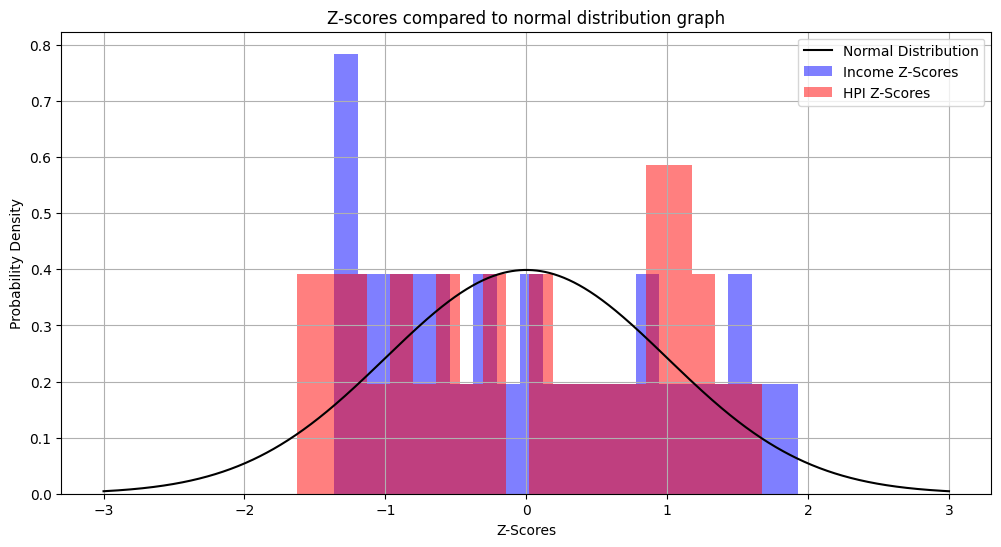

In [25]:
print('What is the graph for the z-scores compared to a normal distribution graph?')

x = np.linspace(-3, 3, 1000)

pdf = stats.norm.pdf(x, loc=0, scale=1) 

plt.figure(figsize=(12, 6))
plt.plot(x, pdf, label='Normal Distribution', color='black')
plt.hist(z_scores_income, bins=20, density=True, alpha=0.5, color='blue', label='Income Z-Scores')
plt.hist(z_scores_hpi, bins=20, density=True, alpha=0.5, color='red', label='HPI Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Probability Density')
plt.title('Z-scores compared to normal distribution graph')
plt.legend()
plt.grid(True)
plt.show()